In [25]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# used to supress display of warnings
import warnings
from IPython.display import clear_output
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import random, copy, math, time
import pandas as pd
import pickle

In [26]:
# suppress display of warnings
warnings.filterwarnings('ignore')

In [27]:
from utils import *

In [28]:
with open(r"D:\Users\DELL\Desktop\Major Project\Github Face Rec\embeddings\met-embeddings.pkl","rb") as f:
    metadata, embeddings = pickle.load(f)

In [29]:
f.close()

In [30]:
type(embeddings)

numpy.ndarray

In [31]:
x = embeddings

In [32]:
x.shape

(17489, 2622)

In [33]:
y = np.array([m.name[5:] for m in metadata])

In [34]:
y.shape

(17489,)

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, stratify = y)

In [37]:
pd.Series(y_train).value_counts()

Leonardo DiCaprio     189
Robert Downey Jr      185
Katherine Langford    182
Alexandra Daddario    179
elizabeth olsen       176
                     ... 
jeff bezos             84
Morgan Freeman         83
Cristiano Ronaldo      78
Mark Zuckerberg        75
Lionel Messi           68
Length: 105, dtype: int64

In [38]:
len(np.unique(y_train))

105

In [39]:
len(np.unique(y_test))

105

In [40]:
from collections import Counter
from matplotlib.patches import Patch

# Compute the distribution of examples across classes
def plot_class_distribution(y,title,filename,x_label='Celebrities',y_label='Number of Samples'):
    class_distribution = Counter(y)

    # Extract class names and corresponding counts
    class_names = list(class_distribution.keys())
    class_counts = list(class_distribution.values())

    # Define custom frequency ranges and colors
    frequency_ranges = [(0, 50), (50, 100), (100, 150), (150, 200), (200, 250)]  # Define frequency ranges
    colors = ['yellow','green', 'blue', 'orange', 'red']  # Define colors for each range

    # Create a dictionary to map each class to its corresponding color
    class_color_map = {}
    for cls, count in zip(class_names, class_counts):
        for i, (start, end) in enumerate(frequency_ranges):
            if start <= count and count < end:
                class_color_map[cls] = colors[i]
                break

    # Plotting
    plt.figure(figsize=(20, 10))  # Increase the figure width
    bars = plt.bar(class_names, class_counts)

    # Set colors for each bar based on class
    for bar, cls in zip(bars, class_names):
        bar.set_color(class_color_map.get(cls, 'gray'))  # Assign color based on the class

    # Create custom legend
    legend_elements = []
    for (start, end), color in zip(frequency_ranges, colors):
        label = f'{start}-{end}'
        legend_elements.append(Patch(color=color, label=label))

    plt.legend(handles=legend_elements, title='Frequency Ranges')

    plt.xlabel('Celebrities')
    plt.ylabel('Number of Samples')
    plt.title(title)
    plt.xticks(rotation=90, ha='right')  # Rotate the x-axis labels for better visibility
    plt.grid(axis='y', which='major')  # Show only horizontal grid lines
    plt.tight_layout()  # Adjust layout to prevent clipping of labels
    plt.savefig(filename)
    plt.show()

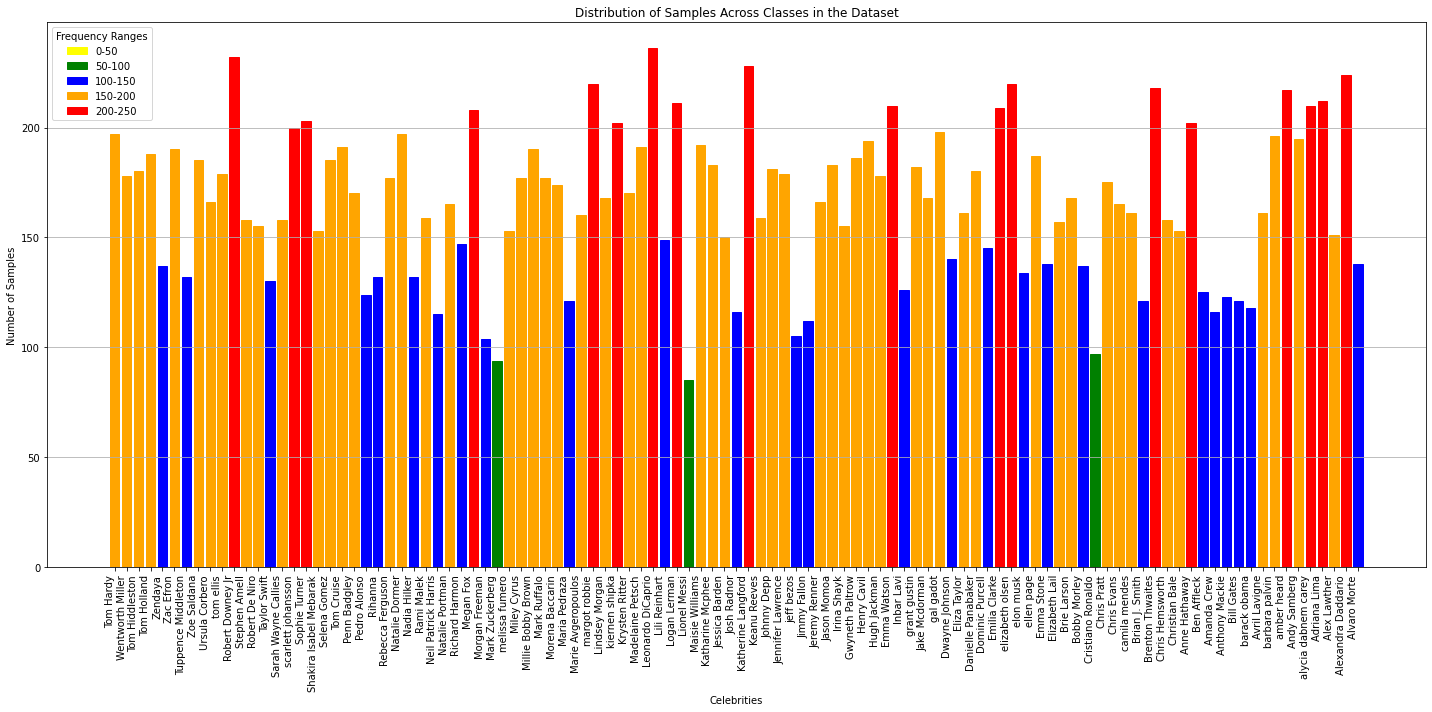

In [41]:
plot_class_distribution(y,'Distribution of Samples Across Classes in the Dataset','y_dist.jpg')

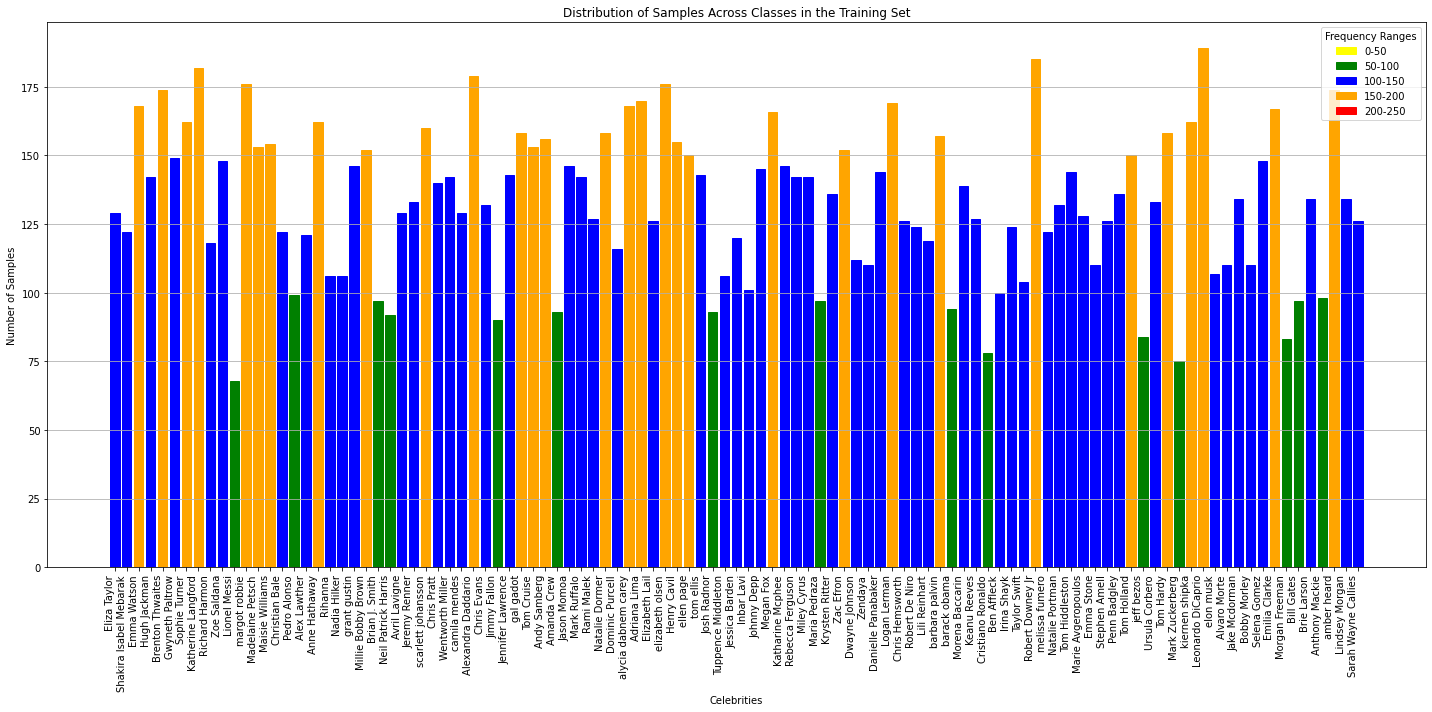

In [42]:
plot_class_distribution(y_train,'Distribution of Samples Across Classes in the Training Set','y_train_dist.jpg')

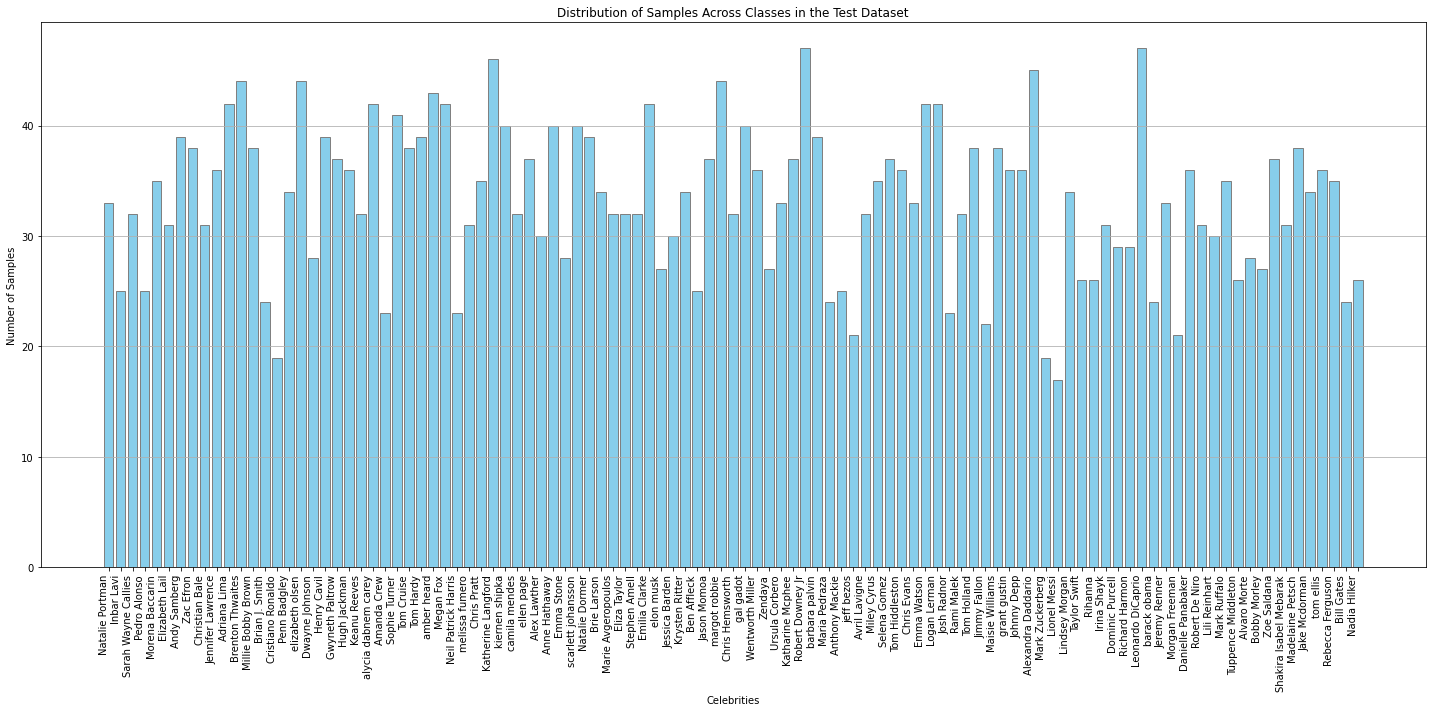

In [43]:
# Compute the distribution of examples across classes
class_distribution = Counter(y_test)

# Extract class names and corresponding counts
class_names = list(class_distribution.keys())
class_counts = list(class_distribution.values())

# Define custom frequency ranges and colors
frequency_ranges = [(0, 50), (50, 100), (100, 150), (150, 200), (200, 250)]  # Define frequency ranges
colors = ['skyblue','green', 'blue', 'orange', 'red']  # Define colors for each range

# Create a dictionary to map each class to its corresponding color
class_color_map = {}
for cls, count in zip(class_names, class_counts):
    for i, (start, end) in enumerate(frequency_ranges):
        if start <= count and count < end:
            class_color_map[cls] = colors[i]
            break

# Plotting
plt.figure(figsize=(20, 10))  # Increase the figure width
bars = plt.bar(class_names, class_counts)

# Set colors for each bar based on class
for bar, cls in zip(bars, class_names):
    bar.set_color(class_color_map.get(cls, 'gray'))  # Assign color based on the class
    bar.set_edgecolor('gray')

# Create custom legend
legend_elements = []
for (start, end), color in zip(frequency_ranges, colors):
    label = f'{start}-{end}'
    legend_elements.append(Patch(color=color, label=label))

# plt.legend(handles=legend_elements, title='Frequency Ranges')

plt.xlabel('Celebrities')
plt.ylabel('Number of Samples')
plt.title('Distribution of Samples Across Classes in the Test Dataset')
plt.xticks(rotation=90, ha='right')  # Rotate the x-axis labels for better visibility
plt.grid(axis='y', which='major')  # Show only horizontal grid lines
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.savefig('y_test_dist.jpg')
plt.show()

In [44]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_train)

In [45]:
x_test_std = scaler.transform(x_test)

In [46]:
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

In [47]:
print(le.classes_)
y_test_encoded = le.transform(y_test)

['Adriana Lima' 'Alex Lawther' 'Alexandra Daddario' 'Alvaro Morte'
 'Amanda Crew' 'Andy Samberg' 'Anne Hathaway' 'Anthony Mackie'
 'Avril Lavigne' 'Ben Affleck' 'Bill Gates' 'Bobby Morley'
 'Brenton Thwaites' 'Brian J. Smith' 'Brie Larson' 'Chris Evans'
 'Chris Hemsworth' 'Chris Pratt' 'Christian Bale' 'Cristiano Ronaldo'
 'Danielle Panabaker' 'Dominic Purcell' 'Dwayne Johnson' 'Eliza Taylor'
 'Elizabeth Lail' 'Emilia Clarke' 'Emma Stone' 'Emma Watson'
 'Gwyneth Paltrow' 'Henry Cavil' 'Hugh Jackman' 'Inbar Lavi' 'Irina Shayk'
 'Jake Mcdorman' 'Jason Momoa' 'Jennifer Lawrence' 'Jeremy Renner'
 'Jessica Barden' 'Jimmy Fallon' 'Johnny Depp' 'Josh Radnor'
 'Katharine Mcphee' 'Katherine Langford' 'Keanu Reeves' 'Krysten Ritter'
 'Leonardo DiCaprio' 'Lili Reinhart' 'Lindsey Morgan' 'Lionel Messi'
 'Logan Lerman' 'Madelaine Petsch' 'Maisie Williams' 'Maria Pedraza'
 'Marie Avgeropoulos' 'Mark Ruffalo' 'Mark Zuckerberg' 'Megan Fox'
 'Miley Cyrus' 'Millie Bobby Brown' 'Morena Baccarin' 'Morgan 

In [48]:
print('y_train_encoded : ', y_train_encoded)
print('y_test_encoded : ', y_test_encoded)

y_train_encoded :  [ 23  75  27 ... 100  25  76]
y_test_encoded :  [ 63  31  73 ... 104   7  31]


# PCA

In [49]:
from sklearn.decomposition import PCA

pca = PCA(n_components=128)
x_train_pca = pca.fit_transform(x_train_std)
x_test_pca = pca.transform(x_test_std)

### SVM

In [50]:
from sklearn.svm import SVC

clf_pca = SVC(C=5., gamma=0.001)
clf_pca.fit(x_train_pca, y_train_encoded)

SVC(C=5.0, gamma=0.001)

In [51]:
y_predict = clf_pca.predict(x_test_pca)
print("Test Accuracy:", accuracy_score(y_test_encoded, y_predict))

Test Accuracy: 0.9588336192109777


### DNN

In [52]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

model_pca = Sequential([
    Dense(512, activation='relu', input_shape=(128,)),
    Dropout(0.50),  # Adding dropout for regularization
    Dense(256, activation='relu'),
    Dropout(0.50),
    Dense(128, activation='relu'),
    Dropout(0.50),
    Dense(64, activation='relu'),
    Dense(105, activation='softmax')  # Softmax activation for multi-class classification
])

# Compile the model
model_pca.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model_pca.summary()

# Train the model
history_pca = model_pca.fit(x_train_pca, y_train_encoded, epochs=100, batch_size = 256, validation_split=0.25)





Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               66048     
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)              

Epoch 41/100
41/41 [==============================] - 1s 26ms/step - loss: 0.3075 - accuracy: 0.9102 - val_loss: 0.1821 - val_accuracy: 0.9548
Epoch 42/100
41/41 [==============================] - 1s 26ms/step - loss: 0.2912 - accuracy: 0.9159 - val_loss: 0.1827 - val_accuracy: 0.9568
Epoch 43/100
41/41 [==============================] - 1s 27ms/step - loss: 0.2997 - accuracy: 0.9163 - val_loss: 0.1830 - val_accuracy: 0.9534
Epoch 44/100
41/41 [==============================] - 1s 26ms/step - loss: 0.2805 - accuracy: 0.9179 - val_loss: 0.1812 - val_accuracy: 0.9540
Epoch 45/100
41/41 [==============================] - 1s 26ms/step - loss: 0.2902 - accuracy: 0.9169 - val_loss: 0.1738 - val_accuracy: 0.9554
Epoch 46/100
41/41 [==============================] - 1s 26ms/step - loss: 0.2757 - accuracy: 0.9233 - val_loss: 0.1774 - val_accuracy: 0.9563
Epoch 47/100
41/41 [==============================] - 1s 27ms/step - loss: 0.2711 - accuracy: 0.9239 - val_loss: 0.1886 - val_accuracy: 0.9528

In [53]:
predictions = model_pca.predict(x_test_pca)
predicted_classes = np.argmax(predictions, axis=1)
print("Test Accuracy:",accuracy_score(y_test_encoded,predicted_classes))

110/110 [==============================] - 1s 3ms/step
Test Accuracy: 0.9594053744997141


In [54]:
train_preds = model_pca.predict(x_train_pca)
train_pred_classes = np.argmax(train_preds, axis=1)
print("Train Accuracy:",accuracy_score(y_train_encoded,train_pred_classes))

438/438 [==============================] - 2s 4ms/step
Train Accuracy: 0.9894217711385891


In [55]:
report = classification_report(y_test_encoded,predicted_classes)
print(report,'\n')
report = classification_report(y_test_encoded,predicted_classes, output_dict=True)

# Print aggregate metrics
print("Classification Report:")
#print(report)
print("Precision:", report['macro avg']['precision'])
print("Recall:", report['macro avg']['recall'])
print("F1-score:", report['macro avg']['f1-score'])

              precision    recall  f1-score   support

           0       0.93      0.98      0.95        42
           1       0.94      0.97      0.95        30
           2       1.00      0.96      0.98        45
           3       0.97      1.00      0.98        28
           4       1.00      0.96      0.98        23
           5       0.97      1.00      0.99        39
           6       0.95      0.97      0.96        40
           7       1.00      1.00      1.00        25
           8       0.94      1.00      0.97        32
           9       0.96      0.92      0.94        25
          10       1.00      0.96      0.98        24
          11       0.92      0.85      0.88        27
          12       0.95      0.93      0.94        44
          13       1.00      0.96      0.98        24
          14       0.97      0.97      0.97        34
          15       0.94      0.94      0.94        33
          16       1.00      0.97      0.98        32
          17       1.00    

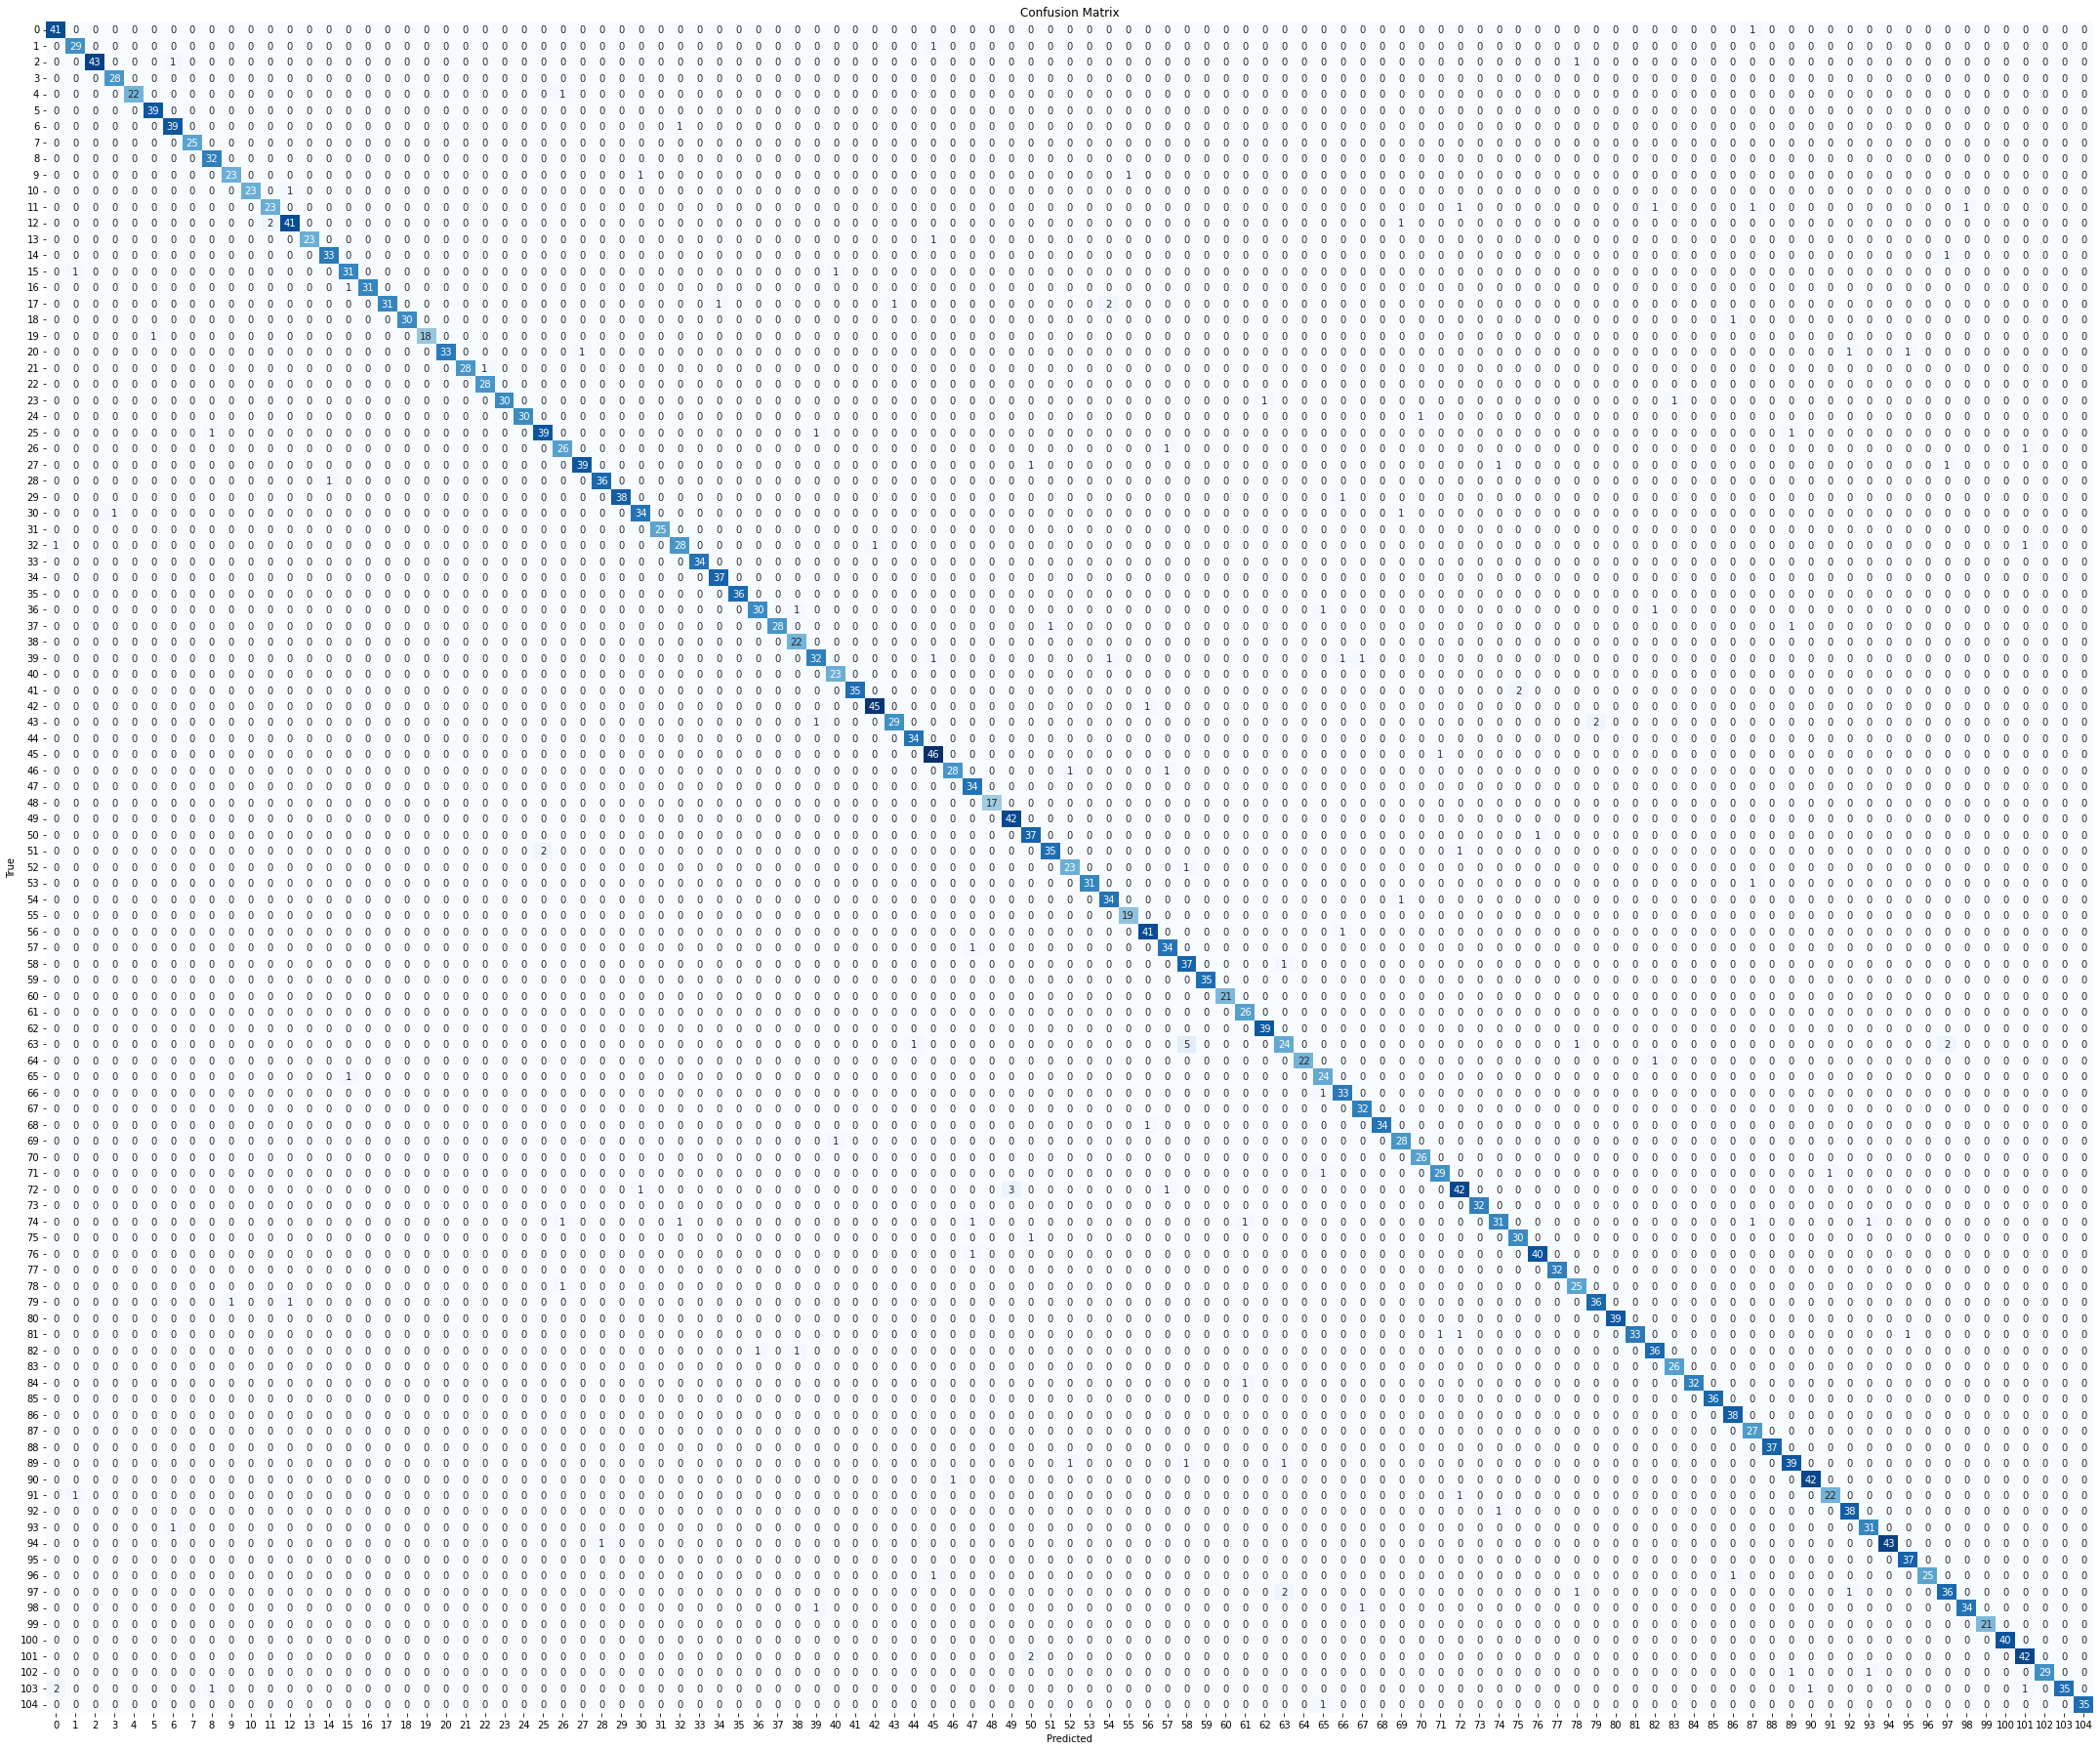

In [56]:
cm = confusion_matrix(y_test_encoded,predicted_classes)
plt.figure(figsize=(30, 25))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [57]:
# Create a DataFrame from the confusion matrix
classes = le.classes_

confusion_df = pd.DataFrame(cm,index=classes, columns=classes)

# Calculate total misclassifications for each class
confusion_df['Total_Misclassifications'] = confusion_df.sum(axis=1) - np.diag(confusion_df)

# Sort by total misclassifications and select the top-N confused classes
top_n_confused_classes = confusion_df.sort_values(by='Total_Misclassifications', ascending=False).head(10)

# Visualize the top-N confused classes
print("Top-10 Confused Classes:")
top_n_confused_classes

Top-10 Confused Classes:


,Adriana Lima,Alex Lawther,Alexandra Daddario,Alvaro Morte,Amanda Crew,Andy Samberg,Anne Hathaway,Anthony Mackie,Avril Lavigne,Ben Affleck,...,elon musk,gal gadot,grant gustin,jeff bezos,kiernen shipka,margot robbie,melissa fumero,scarlett johansson,tom ellis,Total_Misclassifications
Natalie Portman,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,9
Selena Gomez,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
scarlett johansson,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,35,0,5
Robert Downey Jr,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
Bobby Morley,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,4
Johnny Depp,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
gal gadot,0,0,0,0,0,0,0,0,0,0,...,0,36,0,0,0,0,0,0,0,4
Chris Pratt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
Keanu Reeves,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
Emma Watson,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,3


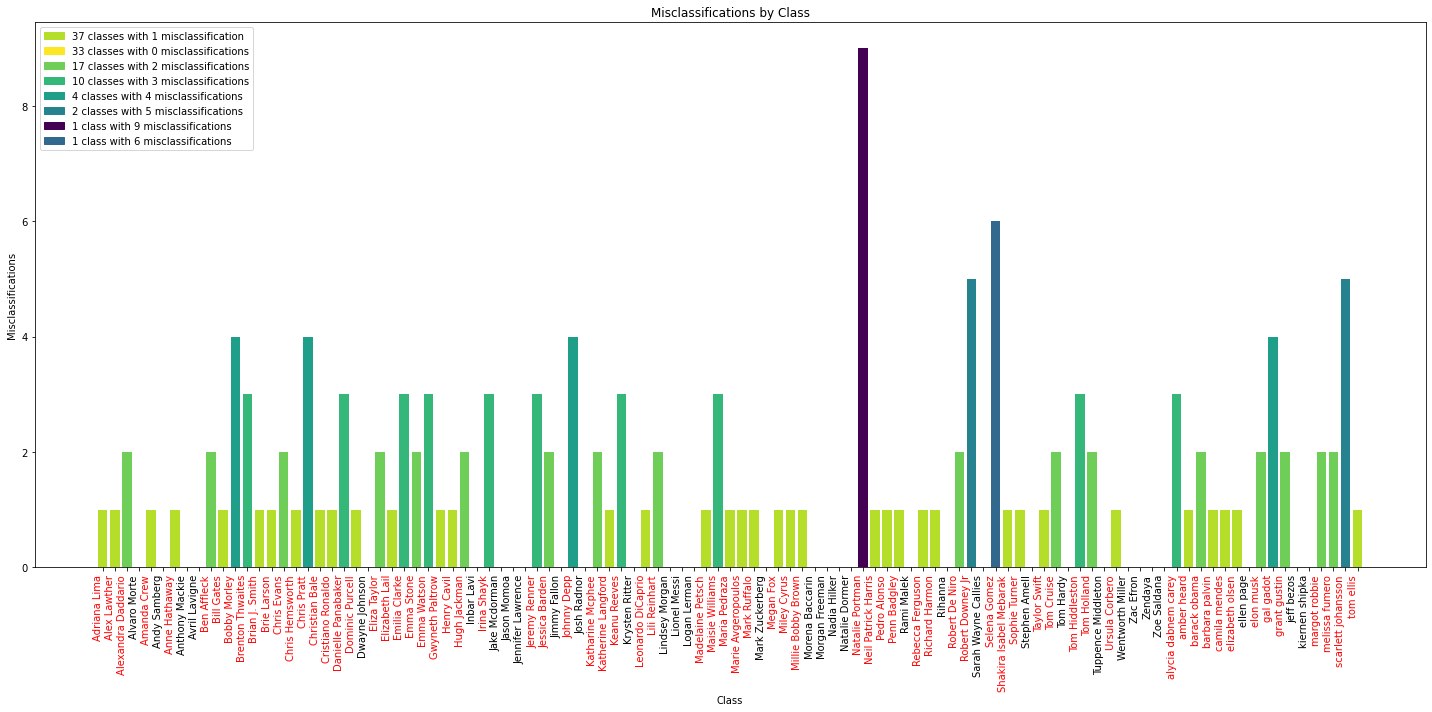

In [58]:
cmap_reversed = plt.cm.viridis.reversed()
# Plot bar graph
plt.figure(figsize=(20, 10))
bars = plt.bar(confusion_df.index, confusion_df['Total_Misclassifications'], color=cmap_reversed(confusion_df['Total_Misclassifications']/max(confusion_df['Total_Misclassifications'])))

# Color labels for classes with non-zero misclassifications
for class_name, misclassification_count in zip(confusion_df.index, confusion_df['Total_Misclassifications']):
    if misclassification_count != 0:
        plt.gca().get_xticklabels()[confusion_df.index.get_loc(class_name)].set_color('red')

plt.xlabel('Class')
plt.ylabel('Misclassifications')
plt.title('Misclassifications by Class')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better visibility

# Create custom legend for colors
legend_handles = []
legend_labels = []
for count, num_classes in confusion_df['Total_Misclassifications'].value_counts().items():
    legend_handles.append(plt.Rectangle((0, 0), 1, 1, color=cmap_reversed(count/max(confusion_df['Total_Misclassifications']))))
    if num_classes==1 and count==1:
        legend_labels.append(f"{num_classes} class with {count} misclassification")
    elif num_classes==1 and count!=1:
        legend_labels.append(f"{num_classes} class with {count} misclassifications")
    elif num_classes!=1 and count==1:
        legend_labels.append(f"{num_classes} classes with {count} misclassification")
    else:
        legend_labels.append(f"{num_classes} classes with {count} misclassifications")
plt.legend(legend_handles, legend_labels, loc='upper left')

plt.tight_layout()
plt.savefig('misclassifications.jpg')
plt.show()


# LDA

In [60]:
lda = LinearDiscriminantAnalysis(n_components=64)  # since n_components cannot be larger than min(num_features, num_classes-1)
x_train_lda = lda.fit_transform(x_train_std, y_train_encoded)
x_test_lda = lda.transform(x_test_std)

In [61]:
x_train_lda.shape, y_train_encoded.shape

((13991, 64), (13991,))

### SVM

In [62]:
clf_lda = SVC(C=5., gamma=0.001)
clf_lda.fit(x_train_lda, y_train_encoded)

SVC(C=5.0, gamma=0.001)

In [63]:
y_predict = clf_lda.predict(x_test_lda)
print("Test Accuracy:", accuracy_score(y_test_encoded, y_predict))

Test Accuracy: 0.9568324757004002


### DNN

In [65]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

model_lda = Sequential([
    Dense(512, activation='relu', input_shape=(64,)),
    Dropout(0.50),  # Adding dropout for regularization
    Dense(256, activation='relu'),
    Dropout(0.50),
    Dense(128, activation='relu'),
    Dropout(0.50),
    Dense(64, activation='relu'),
    Dense(105, activation='softmax')  # Softmax activation for multi-class classification
])

# Compile the model
model_lda.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model_lda.summary()

# Train the model
history_lda = model_lda.fit(x_train_lda, y_train_encoded, epochs=100, batch_size = 256, validation_split=0.25)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 512)               33280     
                                                                 
 dropout_6 (Dropout)         (None, 512)               0         
                                                                 
 dense_11 (Dense)            (None, 256)               131328    
                                                                 
 dropout_7 (Dropout)         (None, 256)               0         
                                                                 
 dense_12 (Dense)            (None, 128)               32896     
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                                 
 dense_13 (Dense)            (None, 64)               

Epoch 48/100
41/41 [==============================] - 1s 24ms/step - loss: 0.0833 - accuracy: 0.9758 - val_loss: 0.0311 - val_accuracy: 0.9923
Epoch 49/100
41/41 [==============================] - 1s 24ms/step - loss: 0.0817 - accuracy: 0.9762 - val_loss: 0.0329 - val_accuracy: 0.9920
Epoch 50/100
41/41 [==============================] - 1s 24ms/step - loss: 0.0909 - accuracy: 0.9722 - val_loss: 0.0329 - val_accuracy: 0.9917
Epoch 51/100
41/41 [==============================] - 1s 24ms/step - loss: 0.0878 - accuracy: 0.9750 - val_loss: 0.0339 - val_accuracy: 0.9923
Epoch 52/100
41/41 [==============================] - 1s 24ms/step - loss: 0.0761 - accuracy: 0.9789 - val_loss: 0.0314 - val_accuracy: 0.9923
Epoch 53/100
41/41 [==============================] - 1s 24ms/step - loss: 0.0756 - accuracy: 0.9783 - val_loss: 0.0344 - val_accuracy: 0.9923
Epoch 54/100
41/41 [==============================] - 1s 23ms/step - loss: 0.0817 - accuracy: 0.9767 - val_loss: 0.0338 - val_accuracy: 0.9923

In [66]:
predictions = model_lda.predict(x_test_lda)
predicted_classes = np.argmax(predictions, axis=1)
print("Test Accuracy: ", accuracy_score(y_test_encoded,predicted_classes))

110/110 [==============================] - 0s 3ms/step
Test Accuracy:  0.955117209834191


In [67]:
train_preds = model_lda.predict(x_train_lda)
train_pred_classes = np.argmax(train_preds, axis=1)
print("Train Accuracy", accuracy_score(y_train_encoded,train_pred_classes))

438/438 [==============================] - 2s 4ms/step
Train Accuracy 0.9980701879779859


In [68]:
report = classification_report(y_test_encoded,predicted_classes)
print(report,'\n')
report = classification_report(y_test_encoded,predicted_classes, output_dict=True)

# Print aggregate metrics
print("Classification Report:")
#print(report)
print("Precision:", report['macro avg']['precision'])
print("Recall:", report['macro avg']['recall'])
print("F1-score:", report['macro avg']['f1-score'])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       0.97      1.00      0.98        30
           2       1.00      0.96      0.98        45
           3       1.00      1.00      1.00        28
           4       1.00      0.96      0.98        23
           5       1.00      1.00      1.00        39
           6       1.00      0.97      0.99        40
           7       1.00      1.00      1.00        25
           8       0.97      0.97      0.97        32
           9       0.86      0.96      0.91        25
          10       0.96      1.00      0.98        24
          11       0.88      0.85      0.87        27
          12       0.93      0.98      0.96        44
          13       0.96      0.92      0.94        24
          14       0.94      0.88      0.91        34
          15       0.97      0.94      0.95        33
          16       1.00      1.00      1.00        32
          17       1.00    

# PCA + LDA

In [69]:
pca_lda = LinearDiscriminantAnalysis(n_components=64)  # since n_components cannot be larger than min(num_features, num_classes-1)
x_train_pca_lda = pca_lda.fit_transform(x_train_pca, y_train_encoded)
x_test_pca_lda = pca_lda.transform(x_test_pca)

In [70]:
x_train_pca_lda.shape, y_train_encoded.shape

((13991, 64), (13991,))

### SVM

In [71]:
clf_pca_lda = SVC(C=5., gamma=0.001)
clf_pca_lda.fit(x_train_pca_lda, y_train_encoded)

SVC(C=5.0, gamma=0.001)

In [72]:
y_predict = clf_pca_lda.predict(x_test_pca_lda)
print("Test Accuracy:", accuracy_score(y_test_encoded, y_predict))

Test Accuracy: 0.9611206403659234


### DNN

In [73]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

model_pca_lda = Sequential([
    Dense(512, activation='relu', input_shape=(64,)),
    Dropout(0.50),  # Adding dropout for regularization
    Dense(256, activation='relu'),
    Dropout(0.50),
    Dense(128, activation='relu'),
    Dropout(0.50),
    Dense(64, activation='relu'),
    Dense(105, activation='softmax')  # Softmax activation for multi-class classification
])

# Compile the model
model_pca_lda.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model_pca_lda.summary()

# Train the model
history_pca_lda = model_pca_lda.fit(x_train_pca_lda, y_train_encoded, epochs=100, batch_size = 256, validation_split=0.25)


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 512)               33280     
                                                                 
 dropout_9 (Dropout)         (None, 512)               0         
                                                                 
 dense_16 (Dense)            (None, 256)               131328    
                                                                 
 dropout_10 (Dropout)        (None, 256)               0         
                                                                 
 dense_17 (Dense)            (None, 128)               32896     
                                                                 
 dropout_11 (Dropout)        (None, 128)               0         
                                                                 
 dense_18 (Dense)            (None, 64)               

Epoch 48/100
41/41 [==============================] - 1s 25ms/step - loss: 0.2591 - accuracy: 0.9256 - val_loss: 0.1976 - val_accuracy: 0.9525
Epoch 49/100
41/41 [==============================] - 1s 24ms/step - loss: 0.2452 - accuracy: 0.9324 - val_loss: 0.1996 - val_accuracy: 0.9511
Epoch 50/100
41/41 [==============================] - 1s 25ms/step - loss: 0.2504 - accuracy: 0.9303 - val_loss: 0.1968 - val_accuracy: 0.9543
Epoch 51/100
41/41 [==============================] - 1s 24ms/step - loss: 0.2619 - accuracy: 0.9256 - val_loss: 0.2030 - val_accuracy: 0.9525
Epoch 52/100
41/41 [==============================] - 1s 25ms/step - loss: 0.2347 - accuracy: 0.9331 - val_loss: 0.1976 - val_accuracy: 0.9523
Epoch 53/100
41/41 [==============================] - 1s 24ms/step - loss: 0.2565 - accuracy: 0.9284 - val_loss: 0.1971 - val_accuracy: 0.9517
Epoch 54/100
41/41 [==============================] - 1s 21ms/step - loss: 0.2414 - accuracy: 0.9326 - val_loss: 0.1980 - val_accuracy: 0.9543

In [74]:
predictions = model_pca_lda.predict(x_test_pca_lda)
predicted_classes = np.argmax(predictions, axis=1)
print("Test Accuracy: ", accuracy_score(y_test_encoded,predicted_classes))

110/110 [==============================] - 1s 4ms/step
Test Accuracy:  0.9499714122355631


In [75]:
train_preds = model_pca_lda.predict(x_train_pca_lda)
train_pred_classes = np.argmax(train_preds, axis=1)
print("Train Accuracy", accuracy_score(y_train_encoded,train_pred_classes))

438/438 [==============================] - 2s 3ms/step
Train Accuracy 0.9877778571939104


In [76]:
report = classification_report(y_test_encoded,predicted_classes)
print(report,'\n')
report = classification_report(y_test_encoded,predicted_classes, output_dict=True)

# Print aggregate metrics
print("Classification Report:")
#print(report)
print("Precision:", report['macro avg']['precision'])
print("Recall:", report['macro avg']['recall'])
print("F1-score:", report['macro avg']['f1-score'])

              precision    recall  f1-score   support

           0       0.93      0.98      0.95        42
           1       0.93      0.90      0.92        30
           2       1.00      0.96      0.98        45
           3       1.00      1.00      1.00        28
           4       1.00      0.96      0.98        23
           5       0.95      1.00      0.97        39
           6       0.97      0.95      0.96        40
           7       1.00      1.00      1.00        25
           8       0.94      0.94      0.94        32
           9       0.92      0.96      0.94        25
          10       1.00      0.96      0.98        24
          11       0.85      0.85      0.85        27
          12       0.91      0.93      0.92        44
          13       0.92      0.96      0.94        24
          14       1.00      0.88      0.94        34
          15       0.94      0.94      0.94        33
          16       1.00      0.97      0.98        32
          17       1.00    

## Final Results
### Accuracy Scores Ranking

1) PCA+LDA+SVM : 96.11%

2) PCA+DNN : 95.94%

3) PCA+SVM : 95.88%

4) LDA+SVM : 95.68%

5) LDA+DNN : 95.51%

6) PCA+LDA+DNN : 94.11%

### AT&T Benchmark Dataset Results

1) LDA+SVM : 99.50%

2) PCA+LDA+SVM : 98.75%

3) PCA+DNN : 98.50%

4) LDA+DNN : 98.50%

5) PCA+LDA+DNN : 98.5%

6) PCA+SVM : 90.75%

Major drawback of LDA is that the number of components to be dervied using LDA is dependent on the number of freatures and number of classes. Hence it becomes difficult to make it dynamic.

SVM that is trained does not give probablistic prediction (there is another variant of svm for probabilistic prediction that takes too much time to train) 

Hence we proceed with PCA+DNN which is fits perfectly with our use case